## rf101_basics.py
From tutorials/roofit

In [1]:
import ROOT

Welcome to JupyROOT 6.24/07


In [2]:
# Set up model
# ---------------------
# Declare variables x,mean,sigma with associated name, title, initial
# value and allowed range
x = ROOT.RooRealVar("x", "x", -10, 10)
mean = ROOT.RooRealVar("mean", "mean of gaussian", 1, -10, 10)
sigma = ROOT.RooRealVar("sigma", "width of gaussian", 1, 0.1, 10)


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [3]:
# Build gaussian pdf in terms of x,mean and sigma
gauss = ROOT.RooGaussian("gauss", "gaussian PDF", x, mean, sigma)



In [4]:
# Construct plot frame in 'x'
xframe = x.frame(ROOT.RooFit.Title("Gaussian pdf"))  # RooPlot


In [5]:
# Plot model and change parameter values
# ---------------------------------------------------------------------------
# Plot gauss in frame (i.e. in x)
gauss.plotOn(xframe)



In [6]:
# Change the value of sigma to 3
sigma.setVal(3)


In [7]:
# Plot gauss in frame (i.e. in x) and draw frame on canvas
gauss.plotOn(xframe, ROOT.RooFit.LineColor(ROOT.kRed))


In [8]:
# Generate events
# -----------------------------
# Generate a dataset of 1000 events in x from gauss
data = gauss.generate(ROOT.RooArgSet(x), 10000)  # ROOT.RooDataSet


In [9]:
# Make a second plot frame in x and draw both the
# data and the pdf in the frame
xframe2 = x.frame(ROOT.RooFit.Title(
    "Gaussian pdf with data"))  # RooPlot
data.plotOn(xframe2)
gauss.plotOn(xframe2)


In [10]:
# Fit model to data
# -----------------------------
# Fit pdf to data
gauss.fitTo(data)


<cppyy.gbl.RooFitResult object at 0x(nil)>

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 mean         1.00000e+00  2.00000e+00   -1.00000e+01  1.00000e+01
     2 sigma        3.00000e+00  9.90000e-01    1.00000e-01  1.00000e+01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        1000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=25019.2 FROM MIGRAD    STATUS=INITIATE       10 CALLS          11 TOTAL
                     EDM= unknown      STRATEGY= 1      NO ERROR MATRIX 

In [11]:
# Print values of mean and sigma (that now reflect fitted values and
# errors)
mean.Print()
sigma.Print()


RooRealVar::mean = 1.01746 +/- 0.0300144  L(-10 - 10) 
RooRealVar::sigma = 2.9787 +/- 0.0219217  L(0.1 - 10) 


In [12]:
# Draw all frames on a canvas
c = ROOT.TCanvas("rf101_basics", "rf101_basics", 800, 400)
c.Divide(2)
c.cd(1)
ROOT.gPad.SetLeftMargin(0.15)
xframe.GetYaxis().SetTitleOffset(1.6)
xframe.Draw()
c.cd(2)
ROOT.gPad.SetLeftMargin(0.15)
xframe2.GetYaxis().SetTitleOffset(1.6)
xframe2.Draw()

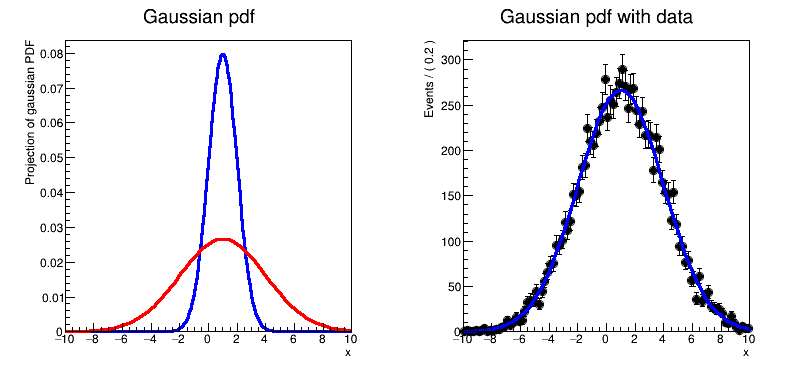

In [13]:
c.Draw()

In [14]:
c.SaveAs("rf101_basics.png")

Info in <TCanvas::Print>: png file rf101_basics.png has been created
